In [77]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import datetime as dt
import time
pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline

In [12]:
os.chdir('D:\Options Data\SPX')
spx_options_files = os.listdir()
spx_file_dates = list(map(lambda x: dt.datetime.strptime(x.split('spx_')[-1].strip('.csv'), '%Y-%m-%d-%H-%M'), 
                          spx_options_files))

In [17]:
files_df = pd.DataFrame(list(zip(spx_file_dates,spx_options_files))).rename(columns = {0:'datetime',
                                                                                       1: 'file'})

In [45]:
puts = pd.DataFrame()

for i, row in files_df[(files_df.datetime > dt.datetime(2018,10,8)) &
                       (files_df.datetime < dt.datetime(2019,1,1))].iterrows():
    curr_puts = pd.read_csv(row.file, index_col = 0, parse_dates = ['Expiry','Quote_Time', 'Last_Trade_Date'])
    curr_puts = curr_puts[(curr_puts.Expiry > dt.datetime(2018,11,20)) &
                          (curr_puts.Type == 'put') &
                          (curr_puts.Strike < 2800)]
    curr_puts.Quote_Time = row.datetime
    curr_puts['Mid'] = (curr_puts.Bid + curr_puts.Ask)/2
    curr_puts[['Strike','Expiry','Symbol','Mid','IV','Underlying_Price','Quote_Time']]
    puts = puts.append(curr_puts)

In [51]:
puts['Quote_Date'] = puts.Quote_Time.dt.date

In [56]:
check_symbols = puts.groupby(['Quote_Date','Symbol']).agg({'Quote_Time':'count'}).reset_index()
check_symbols.head()

,Quote_Date,Symbol,Quote_Time
0,2018-10-08,SPX181221P00100000,82
1,2018-10-08,SPX181221P00250000,82
2,2018-10-08,SPX181221P00300000,82
3,2018-10-08,SPX181221P00500000,82
4,2018-10-08,SPX181221P00650000,82


In [67]:
symbols = check_symbols.groupby('Symbol').agg({'Quote_Date':'count'})


In [69]:
puts = puts[puts.Symbol.isin(symbols[symbols.Quote_Date > 53].sort_values('Quote_Date').index)]

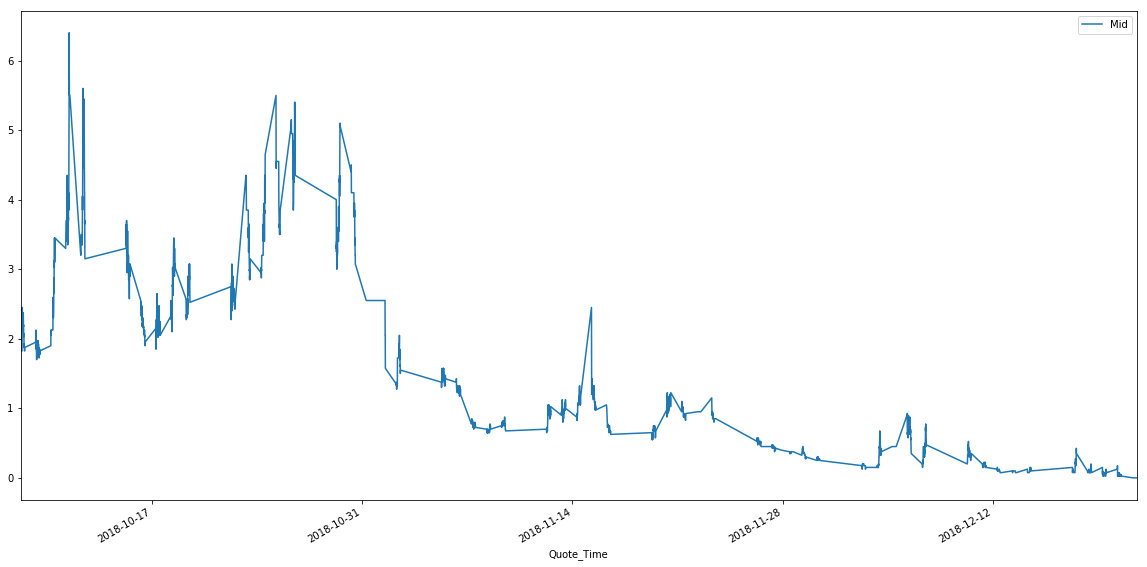

In [79]:
puts[puts.Symbol == 'SPX181221P02000000'][['Quote_Time','Mid']].set_index('Quote_Time').plot(figsize = (20,10))